# Contents <a id='back'></a>

* [1. Introdução](#intro)
* [2. Inicialização](#data_review)
* [3. Carregando dados](#data_preprocessing)
* [4. Pré processamento de dados](#hipóteses)
    * [4.1 Hypotheses](#hypotheses)
    * [4.2 Orders](#orders)
    * [4.3 Visits](#visits)
* [5. Priorizando hipóteses](#hypotheses)
* [6. Análise de teste A/B](#hypotheses)
    * [6.1  Receita cumulativa diária por grupo](#activity)
    * [6.2 Tamanho médio acumulado do pedido por grupo](#week)
    * [6.3 Diferença relativa do grupo B em comparação com o grupo A](#genre)
    * [6.4 Conversão diária cumulativa para cada grupo](#genre)
    * [6.5 Conversão diária cumulativa para cada grupo](#genre)
    * [6.6 Conversão diária cumulativa para cada grupo](#genre)
    * [6.7 Conversão diária cumulativa para cada grupo](#genre)
    * [6.8 Conversão diária cumulativa para cada grupo](#genre)
        * [6.8.1 Conversão diária cumulativa para cada grupo](#genre)
        * [6.8.2 Conversão diária cumulativa para cada grupo](#genre)
    * [6.9 Conversão diária cumulativa para cada grupo](#genre)
        * [6.9.1 Conversão diária cumulativa para cada grupo](#genre)
        * [6.9.2 Conversão diária cumulativa para cada grupo](#genre)
* [7. Conclusão](#end)

## Introdução

Você é analista em uma grande loja online. Junto com o departamento de marketing, você compilou uma lista de hipóteses que podem ajudar a aumentar a receita.

Você precisa priorizar essas hipóteses, lançar um teste A/B e a partir dos resultados tomar uma decisão, se é melhor:
- Parar o teste, considere um dos grupos o líder.
- Parar o teste, conclua que não há diferença entre os grupos.
- Continuar o teste.

## Inicialização

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

## Carregando dados

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

## Pré processamento dos dados

### Hypotheses

- `Hypotheses` — breves descrições das hipóteses
- `Reach` — alcance do usuário, em uma escala de um a dez
- `Impact` — impacto nos usuários, em uma escala de um a dez
- `Confidence` — confiança na hipótese, em uma escala de um a dez
- `Effort` — os recursos necessários para testar uma hipótese, em uma escala de um a dez. Quanto maior o valor de Effort, mais recursos são necessários para o teste.

In [3]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [5]:
hypotheses.duplicated().sum()

0

Possui 9 linhas e 5 colunas.

- Não há valores ausentes.
- Não há valores duplicados.
- Os tipos de dados estão corretos.
- O nome das colunas deveriam ser com letra minúsculas.

In [6]:
hypotheses = hypotheses.rename(columns={'Hypothesis': 'hypotheses',
                            'Reach': 'reach',
                            'Impact': 'impact',
                            'Confidence': 'confidence',
                            'Effort': 'effort'})


In [7]:
#Conferindo se funcionou
hypotheses.columns

Index(['hypotheses', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

### Orders

- `transactionId` — identificador do pedido
- `visitorId` — identificador do usuário que fez o pedido
- `date` — do pedido
- `revenue` — do pedido
- `group` — o grupo de teste A/B ao qual o usuário pertence

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
orders.duplicated().sum()

0

Possui 1197 linhas e 5 colunas

- Não há valores ausentes
- Não há valores duplicados
- O tipo de dados da coluna 'date' deveria ser datetime. O restante está correto.

In [11]:
orders['date'] = pd.to_datetime(orders['date'])

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


Agora os tipos de dados estão corretos.

### Visits

- `date` — data
- `group` — grupo de teste A/B
- `visits` — o número de visitas na data especificada para o grupo de teste A/B especificado

In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visits.duplicated().sum()

0

Possui 62 linhas e 3 colunas.

- Não há valores ausentes
- Não há valores duplicados
- O tipo da coluna 'date' deveria ser do tipo datetime. O restante está correto.

In [16]:
visits['date'] = pd.to_datetime(visits['date'])

In [17]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Agora os tipos de dados estão corretos.

## Priorizando hipóteses

In [18]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) /  hypotheses['effort']
print(hypotheses[['hypotheses', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypotheses        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


As hipóteses 8, 0, 7, 6 e 2 são as mais promissoras.

In [19]:
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) /  hypotheses['effort']
print(hypotheses[['hypotheses', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypotheses   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Novamente, as hipóteses mais promissoras agora foram 7, 2, 0, 6 e 8, mas em ordem diferente.

<AxesSubplot:xlabel='hypotheses'>

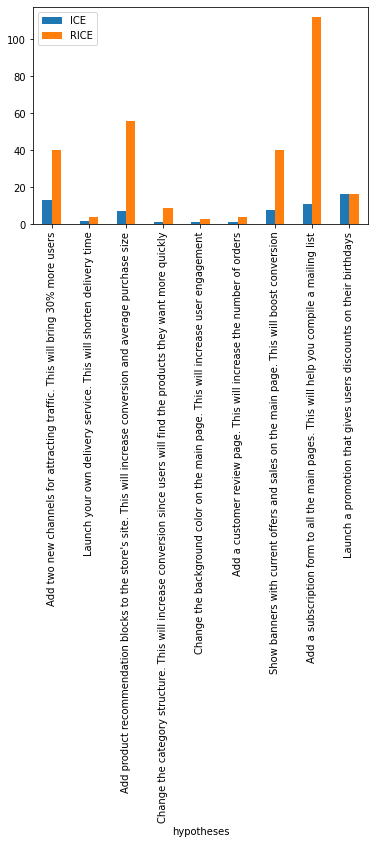

In [20]:
hypotheses.plot(x="hypotheses", y=["ICE", "RICE"], kind="bar") 

- Hipótese 8: no cálculo ICE saiu na 1º posição, enquanto que no RICE saiu na 5º posição, isso pois o parâmetro reach(alcance) é o menor (1).
- Hipótese 0: no cálculo ICE saiu na 2º posição, enquanto que no RICE saiu na 3º posição.
- Hipótese 7: no cálculo ICE saiu na 3º posição, enquanto que no RICE saiu na 1º posição, isso pois possui o parâmetro reach(alcance) maior (10), como podemos ver no gráfico (maior coluna laranja).
- Hipótese 6: continuou na mesma posição.
- Hipótese 2: no cálculo ICE saiu na 5º posição, enquanto que no RICE saiu na 2º posição, pois possui alcance(reach) alto (8).

Além de quão forte é a hipótese, tem que levar em consideração quantos usuários ela afetará.

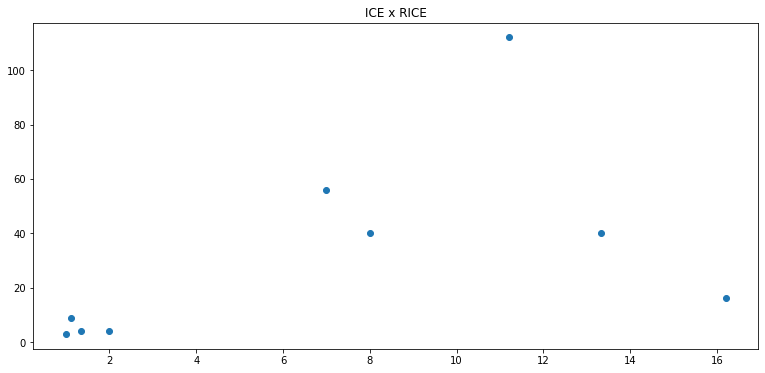

In [21]:
plt.figure(figsize=(13, 6))
plt.title('ICE x RICE')
plt.scatter(hypotheses['ICE'], hypotheses['RICE'])

As hipóteses mais promissoras são:
- 7 (Adicione um formulário de inscrição a todas as páginas principais: isso ajudará você a compilar uma lista de discussão); 
- 0 (Adicione dois novos canais para atrair tráfego. Isso trará 30% mais usuários).

## Análise de teste A/B

### Receita cumulativa diária por grupo

In [22]:
# Construindo um vetor com valores de pares unívocos de grupos de datas
datesGroups = orders[['date', 'group']].drop_duplicates()

In [23]:
# Obtendo dados diários cumulativos agregados sobre pedidos 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'],orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
             'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [24]:
# Obtendo os dados diários agregados cumulativos sobre os visitantes
visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date','group'])

In [25]:
# Juntando as duas tabelas em uma e dando nomes descritivos para suas colunas
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   2356.8       719
1 2019-08-01     B      21      20   1620.0       713
2 2019-08-02     A      44      38   3860.3      1338
3 2019-08-02     B      45      43   4243.8      1294
4 2019-08-03     A      68      62   5675.5      1845


In [26]:
# DataFrame com pedidos cumulativos e receita cumulativa por dia, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]

In [27]:
# DataFrame com pedidos cumulativos e receita cumulativa por dia, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

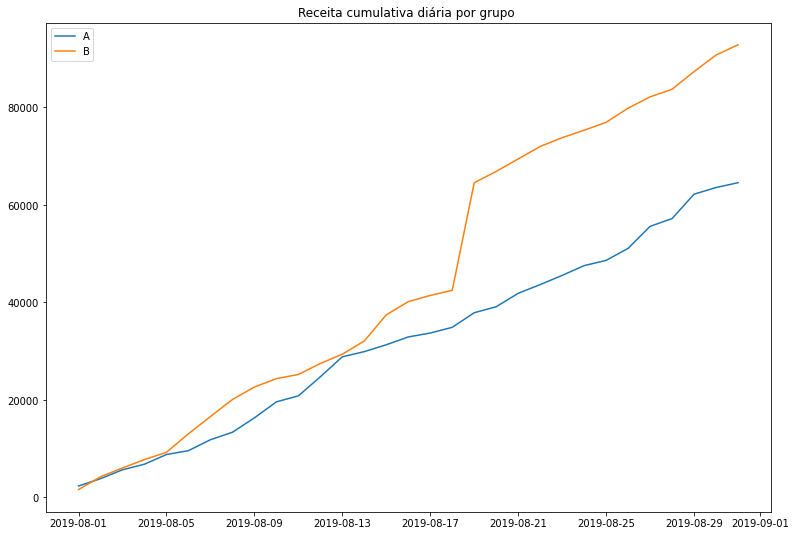

In [28]:
# determinando o tamanho do gráfico
plt.figure(figsize=(13, 9))

# adicionando título ao gráfico
plt.title('Receita cumulativa diária por grupo ')

# construindo o gráfico de receita do grupo A 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# construindo o gráfico de receita do grupo B 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# adicionando legenda ao gráfico
plt.legend()

O segmento B assumiu a lideraça a partir do terceito dia de teste e se manteve na frente. 

In [29]:
cumulativeData.groupby('group').agg({'orders': 'count', 'revenue': 'sum'})

,orders,revenue
group,,
A,31,993927.1
B,31,1416949.0


Os dois grupos tiveram a mesma quantidade de pedidos, porém, o grupo B possui quase o dobro de receita. Parece que pedidos absurdamente grandes afetaram os resultados finais. 

### Tamanho médio acumulado do pedido por grupo

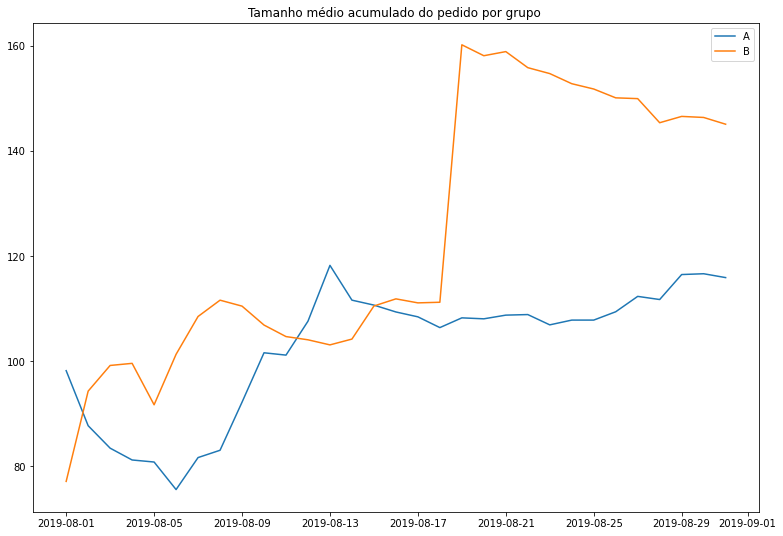

In [30]:
plt.figure(figsize=(13, 9))
plt.title('Tamanho médio acumulado do pedido por grupo ')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

O valor cumulativo dos volumes de compra apresenta ainda flutuações, tendo o segmento B um pico entre os dias 17 e 21 e se mantendo muito maior que o segmento A, confirmando a conclusão anterior, foram feitos grandes pedidos. 

### Diferença relativa do grupo B em comparação com o grupo A

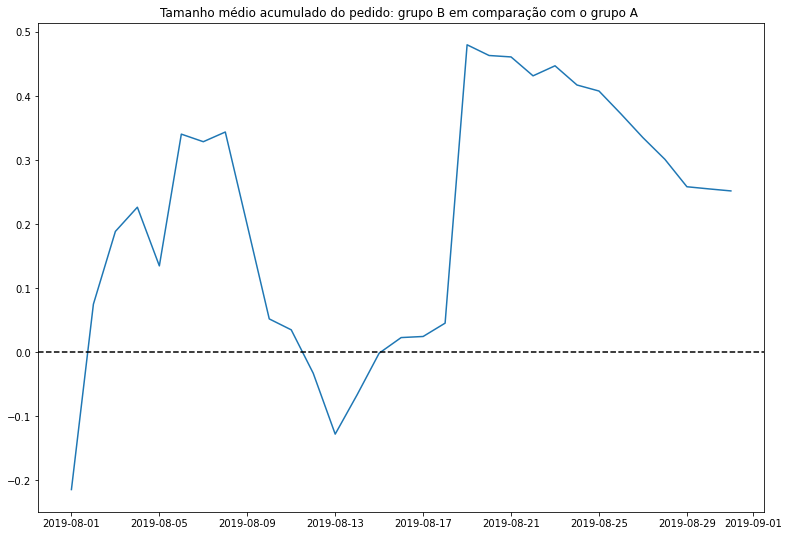

In [31]:
# reunindo os dados em um DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13, 9))
plt.title('Tamanho médio acumulado do pedido: grupo B em comparação com o grupo A ')

# construindo um gráfico de diferença relativa para os volumes médios de compra
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# acrescentando o eixo X
plt.axhline(y=0, color='black', linestyle='--')


Há diversas ocorrências de alterações repentinas e consideráveis. Provavelmente elas estejam relacionadas a pedidos muito maiores do que o padrão.
Como visto anteriormente, apos o dia 17, o grupo B se destaca muito mais em comparação ao grupo A.

### Conversão diária cumulativa para cada grupo

(18109.0, 18140.0, 0.0, 0.05)

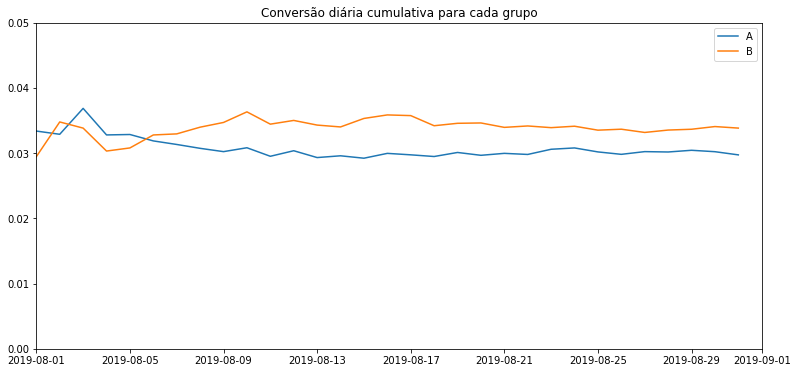

In [32]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(13, 6))
plt.title('Conversão diária cumulativa para cada grupo')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0, 0.05])

No começo do teste, o segmento A possuia uma taxa de conversão maior, mas o segmento B gradualmente cresceu e se estabilizou em um valor praticamente estável. 

### Diferença relativa na conversão cumulativa do grupo B comparado com o grupo A

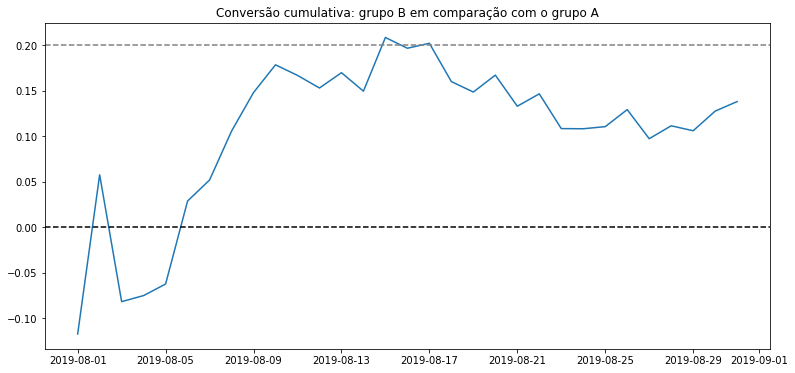

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13, 6))
plt.title('Conversão cumulativa: grupo B em comparação com o grupo A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

Como visto anteriormente, no início o segmento A possuia uma taxa de conversão maior, mas o segmento B gradualmente cresceu e se tornou líder em conversão, se estabilizando entre 10% a 15% acima que o grupo A.

### Quantidade de pedidos por usuário

orders
1     937
2      64
3      17
5       6
4       3
11      2
8       1
9       1
Name: userId, dtype: int64


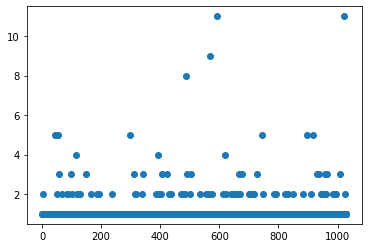

In [34]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.groupby('orders')['userId'].count().sort_values(ascending=False))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

Quase não existem pedidos com mais de 2 pedidos. Casos como esses também podem acabar tornando -se anomalias. 

Dois pedidos - é comum ou demais? Vamos calcular os percentis para tirar essa dúvida.

In [35]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Menos que 10% dos usuários fez mais que 1 pedido, menos que 5% dos usuários fez mais do que 2 pedidos e menos que 1% fez mais que 4 pedidos; portanto vou considerar mais que 2 pedidos uma anomalia.

### Preços por pedidos

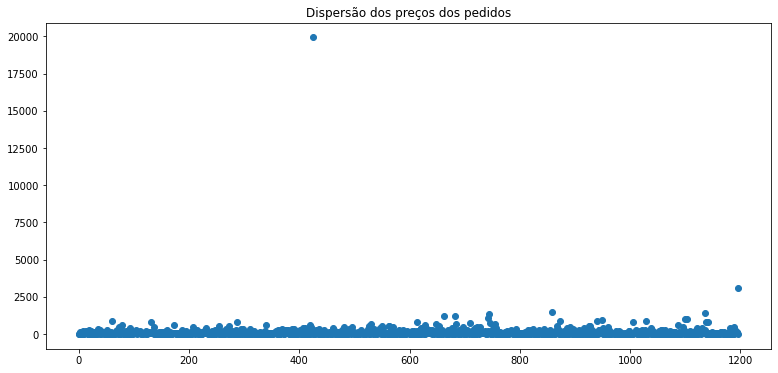

In [36]:
plt.figure(figsize=(13, 6))
plt.title('Dispersão dos preços dos pedidos')
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Geralmente os valores não ultrapassam 2500. Esse valor muito acima da média (aproximadamente 20000), provavelmente é do grupo B, o que fez com que o segmento tenha receita muito maior que o segmento A.

Existem apenas 2 valores maiores que 2500 (3120.1 e 19920.4), portanto vou considerar valores acima de 2500 são atípicos.

In [37]:
print(orders['revenue'].sort_values(ascending=False))
print(np.percentile(orders['revenue'], [90, 95, 99]))

425     19920.4
1196     3120.1
858      1450.2
1136     1425.8
744      1335.6
         ...   
390         5.2
414         5.2
602         5.1
404         5.1
1003        5.0
Name: revenue, Length: 1197, dtype: float64
[282.48  435.54  900.904]


Menos que 10% dos usuários gastaram mais que 282.48, menos que 5% dos usuários gastaram mais do que 435.54 e menos que 1% gastou mais que 900.90, sendo esses valores atípicos.

### Com dados brutos

#### Diferença na conversão entre os grupos

In [38]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns=['userId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

print("{:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.01679
0.138


O valor -p é menor que 0.05, então rejeitamos a hipótese nula (que são iguais). A análise dos dados brutos mostrou que as taxas de conversão dos grupos possuem diferenças estatísticas significativas. O ganho de conversão relativo para o grupo B, comparado com o grupo A, é 13.8%

#### Diferença no tamanho médio do pedido entre os grupos

In [39]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

0.692
0.252


O valor -p é maior que 0.05 (nível de significância adotado), então não há diferenças estatísticas significativas entre os volumes médios de pedidos dos grupos; não há evidências para se rejeitar a hipótese nula; a aceitamos provisoriamente.

### Com dados filtrados

In [40]:
# Definindo usuários atípicos
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] >= 3]['userId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 2500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head())

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
dtype: int64


Esses são os usuários atípicos.

#### Diferença na conversão entre os grupos

In [41]:
# Filtrando usuários atípicos dos dados
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01360
0.166


Assim como ocorreu com os dados brutos, atingimos o nível de significância. O segmento B é melhor que o segmento A.

#### Diferença no tamanho médio do pedido entre os grupos

In [42]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.635
-0.098


Mesmo com os dados atípicos filtrados, o valor -p é maior que 0.05, então não há diferenças estatísticas significativas entre os volumes médios de pedidos dos grupos.

De acordo com os testes realizados, não há motivos para continuar o teste: o grupo B pontuou melhor na conversão e essa diferença possui significância estatística. 

## Conclusão

Iniciei importando as bibliotecas pandas, numpy, matplotlib, scipy e carregando as tabelas de hipóteses, pedidos e visitas.

Em seguida, o pré processamento dos dados, onde:

**Tabela hypotheses**
- Substitui os nomes das colunas, que estavam com letras maiúsculas, por letras minúsculas

**Tabela pedidos**
- Mudei o tipo das colunas 'date' para o tipo datetime

**Tabela visitas**
- Mudei o tipo das colunas 'date' para o tipo datetime

Sobre a priorização de hipóteses:
- Considero as mais promissoras a 7 (Adicione um formulário de inscrição a todas as páginas principais: isso ajudará você a compilar uma lista de discussão), 0 (Adicione dois novos canais para atrair tráfego. Isso trará 30% mais usuários) e 2 (Adicione blocos de recomendação de produtos ao site da loja. Isso aumentará a conversão e o tamanho médio da compra).

Depois, iniciei a análise dos testes A/B: 
- De acordo com os cálculos e gráficos apresentados não há motivos para continuar o teste: o grupo B pontuou melhor na conversão e essa diferença possui significância estatística. Além disso, o gráfico de conversão indica que o resultado é estável. Vamos parar o teste e considerar o grupo B o líder.